In [21]:
import sys
sys.path.append('../utils/')
from my_psola import *
from pitch_detectors import *
from signal_manager import *
from scipy.io import wavfile
from IPython.display import Audio

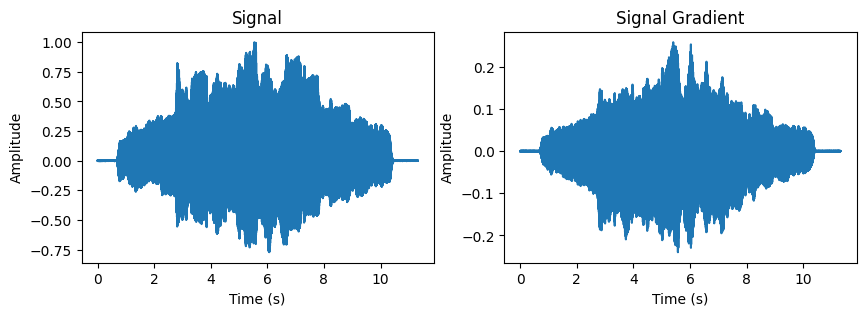

In [22]:
samplerate, signal = wavfile.read('../data/VocalSet/FULL/female1/scales/belt/f1_scales_belt_a.wav')
signal = signal/np.max(signal)
visualize_signal(signal, samplerate)
Audio(signal, rate=samplerate)

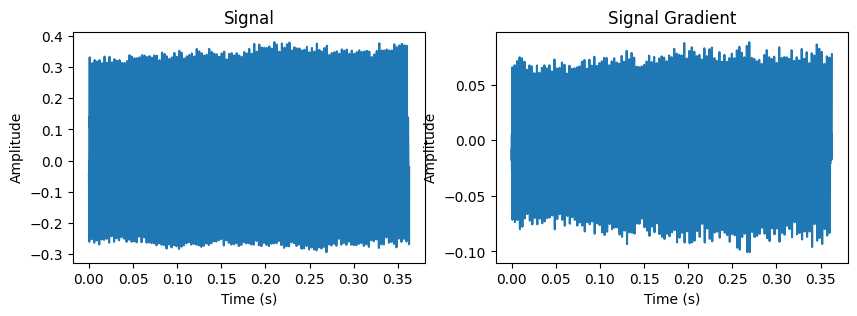

In [53]:
subsignal = signal[102000:118000]
#subsignal = signal[102000:103000]

visualize_signal(subsignal, samplerate)
Audio(subsignal, rate=samplerate)

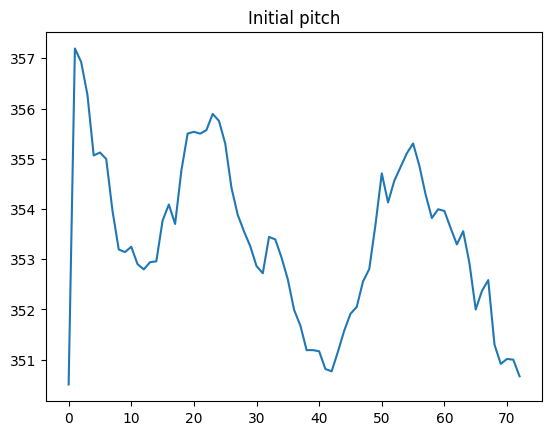

In [54]:
frame_size = int(2e-2 * samplerate) # framsize of 20ms (nearest integer)
initial_pitch = yin(subsignal, fmin=80, fmax=1000, sr=samplerate, frame_length=frame_size)
plt.figure()
plt.plot(initial_pitch)
plt.title('Initial pitch')
plt.show()

Detected f0:  353.39258634943303 Hz


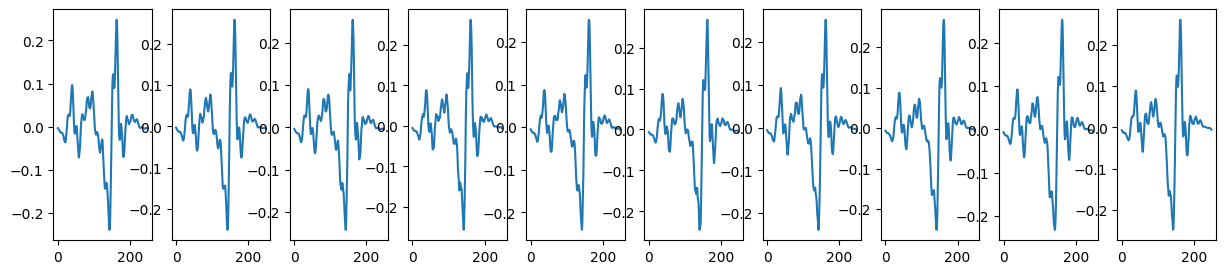

In [56]:
pitch_synchronous_signal, f0 = pitch_synchronous_analysis(subsignal, samplerate, mu=2)
display_pitch_synchronous_signal(pitch_synchronous_signal)

In [6]:
Audio(subsignal, rate=samplerate)

In [58]:
target_f0 = 300
autotuned_signal = td_psola(subsignal, samplerate, target_f0)
Audio(autotuned_signal, rate=samplerate)

Detected f0:  353.39258634943303 Hz


## On full signal

Now we have to adapt our algorithm so it is able to take an entire song, and change each pitch.
A first step would be to remove silences.

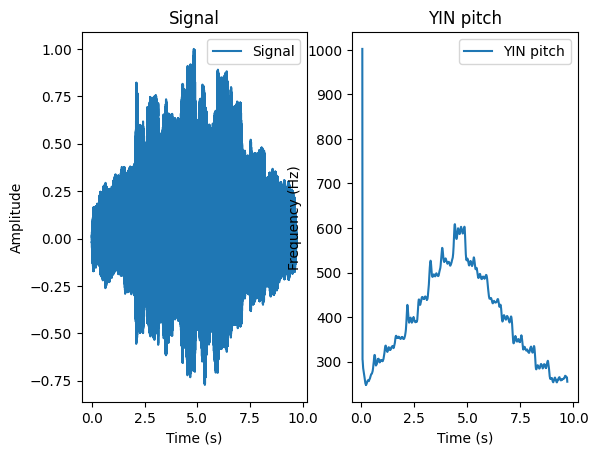

In [8]:
frame_size = int(2e-2 * samplerate) 
signal_cleaned = remove_silence(signal)

full_pitch = pitch_yin = yin(signal_cleaned, fmin=80, fmax=1000, sr=samplerate, frame_length=frame_size)
visualize_signal(signal_cleaned, samplerate, yin_pitch=full_pitch)
Audio(signal_cleaned, rate=samplerate)


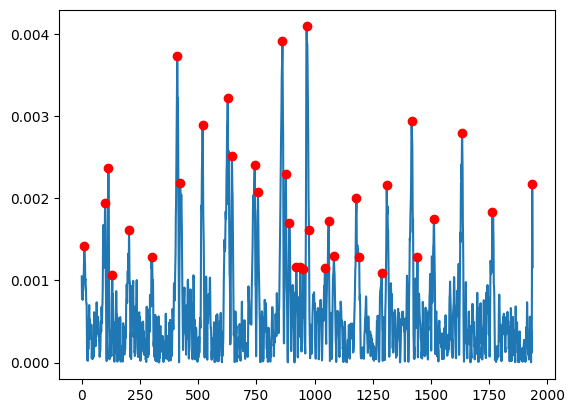

In [15]:
full_pitch_gradient = np.abs(np.gradient(full_pitch))
full_pitch_gradient /= np.max(full_pitch_gradient)
full_pitch_gradient = np.log10(full_pitch_gradient + 1)

full_pitch_gradient = full_pitch_gradient[10:]

pitch_change = detect_pitch_change(full_pitch[10:], threshold=1e-1)

plt.plot(full_pitch_gradient)
plt.plot(np.transpose(pitch_change), full_pitch_gradient[pitch_change], 'ro')

In [16]:
signals_splitted, pitches = split_signal(signal_cleaned[10:], pitch_change, pitch=full_pitch[10:], window_size=len(signal)//len(full_pitch))
print(len(pitches))    

Audio(signals_splitted[9], rate=samplerate)


35


In [64]:
f0_increase = -150
signals_splitted_new = signals_splitted.copy()
for i in range(len(signals_splitted)):
    signals_splitted_new[i] = td_psola(signals_splitted[i], samplerate, pitches[i]+f0_increase, mu=2)

Detected f0:  289.0265912332509 Hz
Detected f0:  263.3802508535021 Hz
Detected f0:  301.5329952798481 Hz
Detected f0:  301.58221089716375 Hz
Detected f0:  303.65390815557726 Hz
Detected f0:  333.50388605429293 Hz
Detected f0:  374.93909860348697 Hz
Detected f0:  398.0322458070729 Hz
Detected f0:  435.0565448619845 Hz
Detected f0:  493.2926753037905 Hz
Detected f0:  509.71067944545104 Hz
Detected f0:  525.1820966707943 Hz
Detected f0:  590.295722061777 Hz
Detected f0:  589.7047543381167 Hz
Detected f0:  517.9971877740029 Hz
Detected f0:  523.4774859704017 Hz
Detected f0:  521.5675989462295 Hz
Detected f0:  508.01776317428386 Hz
Detected f0:  489.49346277082765 Hz
Detected f0:  494.91080316703085 Hz
Detected f0:  486.3576718199512 Hz
Detected f0:  487.4201469897865 Hz
Detected f0:  441.06911790266446 Hz
Detected f0:  433.90801181191426 Hz
Detected f0:  421.85720050541846 Hz
Detected f0:  401.14197050538866 Hz
Detected f0:  350.99804468517664 Hz
Detected f0:  350.9927143964612 Hz
Detected

In [65]:
signal_recombined = recombine_signals(signals_splitted_new)
Audio(signal_recombined, rate=samplerate)